In [10]:
import pandas as pd
import geopandas

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import rasterio
import rasterio.mask

In [11]:
# shapes
gdf = geopandas.read_file('../input/shapes/Districts_Shapefiles_2019/Districts and TC as 2020 FIXED.shp')

In [17]:
mask = [gdf.at[0, 'geometry']]

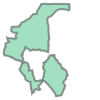

In [18]:
mask[0]

In [24]:
tiff = '../input/data/rcmrd_elev/Tanzania_SRTM30meters.tif'
with rasterio.open(tiff) as src:
    nodata = src.nodata
    
    # read complete tiff
    #band1 = src.read(1)    

    # read single shape
    out_image, out_transform = rasterio.mask.mask(src, mask, crop=True, nodata=nodata)
    out_meta = src.meta
    band1 = out_image[0]
    
    if np.issubdtype(band1.dtype, np.integer):
        band1 = band1.astype(np.float32)
        
    band1[band1==nodata] = np.nan

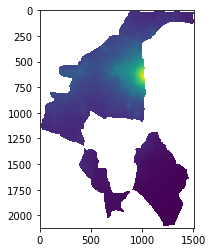

In [25]:
plt.imshow(band1)

In [27]:
np.count_nonzero(~np.isnan(band1))

1304711

In [30]:
np.count_nonzero(band1 < 1600)

824052

In [33]:
band1[band1>=1600] = np.nan

In [34]:
np.count_nonzero(~np.isnan(band1))

824052

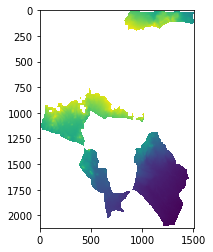

In [23]:
plt.imshow(band1)